[[ 0.  0.  0.  0. 14.  7.  0.  0.]
 [ 0.  0.  0. 13. 16.  9.  0.  0.]
 [ 0.  0. 10. 16. 16.  7.  0.  0.]
 [ 0.  7. 16.  8. 16.  2.  0.  0.]
 [ 0.  1.  5.  6. 16.  6.  0.  0.]
 [ 0.  0.  0.  4. 16.  6.  0.  0.]
 [ 0.  0.  0.  2. 16.  6.  0.  0.]
 [ 0.  0.  0.  0. 12. 11.  0.  0.]]


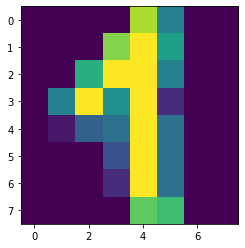

[[-4294.94377409   759.80560176 -5450.34712781 -2417.81294039
   -519.89948658 -1345.7271835  -3542.91185061 -2259.33560993
  -1237.20266333 -2803.25131353]]
[[118   0   0   1   0   0   0   0   0   0]
 [  0 113   0   0   0   0   2   0   3   3]
 [  0   0 115   0   0   0   0   1   0   1]
 [  0   1   0 116   0   1   0   0   2   1]
 [  0   0   0   0 117   0   0   0   0   3]
 [  0   0   0   1   0 117   0   1   0   4]
 [  0   1   0   0   0   0 118   0   1   0]
 [  0   0   0   0   1   0   0 114   0   3]
 [  0   9   1   2   0   3   1   0 100   3]
 [  0   0   0   1   0   1   0   0   2 118]]


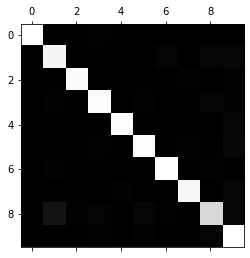

In [20]:
# digit datasets
# and their operation

import numpy as np
from sklearn import datasets
#import classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#get sgd object
sgd_clf=SGDClassifier(random_state=42)


mnist=datasets.load_digits()
X,y=mnist.data,mnist.target

#show off some digits

some_digits=X[70]

print(some_digits.reshape(8,8))
new_digits=some_digits-1 #modification to image

# every digits is represented by 8*8 pixel with 64 attributes
#print(some_digits)
new_digits_image=new_digits.reshape(8,8)

some_digits_image=some_digits.reshape(8,8)

#plt.imshow(some_digits_image,cmap=matplotlib.cm.binary)
plt.imshow(some_digits_image)# if we use ,cmap=matplotlib.cm.binary than it convert image in binary image known as bitmap image
plt.show()


#data split
X_train,X_test,y_train,y_test=X[:1200],X[1200:],y[:1200],y[1200:]
#for direct
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=33)

#for shufflleing the index
shuffle_index=np.random.permutation(1200)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

#fitting the model
sgd_clf.fit(X_train,y_train)

some_digits_scores=sgd_clf.decision_function([some_digits]) #it give score for every class decide 
print(some_digits_scores) # lable the class with high score





predicted_value=sgd_clf.predict(X_test)
#cross validation k fold algorithm
cross_val_score(sgd_clf,X_train,y_train,cv=4,scoring="accuracy")
#prediction

#confusion matrix with confusion_matrix function
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
print(conf_mx) # confusion matrix

plt.matshow(conf_mx,cmap=plt.cm.gray) # graphical representation of confusion matrix
plt.show()






[[9.77586207]]


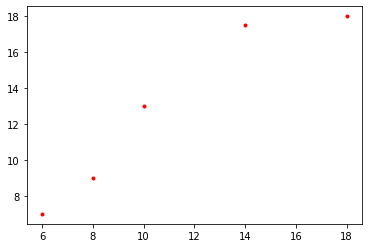

In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x=[[6],[8],[10],[14],[18]]
y=[[7],[9],[13],[17.5],[18]]
model=LinearRegression()
model.fit(x,y)
a=model.predict([[8]])
print(a)
plt.plot(x,y,'r.')
plt.show()

AttributeError: 'function' object has no attribute 'plot_tree_partition'

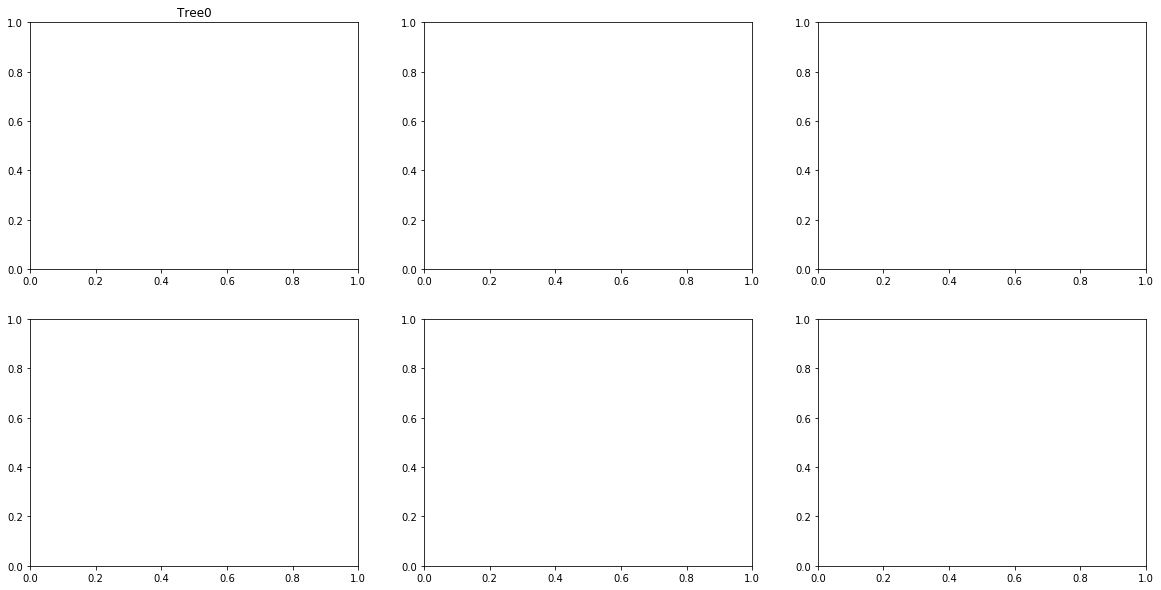

In [14]:
#random forest algorithms
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris=datasets.load_iris()
X,y=iris.data,iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree{}".format(i))
    plt.plot.plot_tree_partition(X_train,y_train,tree,ax=ax)
    
plt.plots.plot_2d_separator(forest,X_train,y_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("random forest")
plt.discrete_scatter(X_train[:,0],X_train[:,1],y_train)











